In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [58]:
df = pd.read_csv('bank-additional-full.csv', delimiter= ';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.shape

(41188, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
df[df.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [59]:
df = df.drop_duplicates()

In [10]:
df.shape

(41176, 21)

In [11]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [27]:
df['y'].value_counts()/ len(df)

no     0.887356
yes    0.112644
Name: y, dtype: float64

In [13]:
def plot_bar(data, field_name):
    df_visualize = data.groupby(field_name)['y'].value_counts().unstack()

    labels = df_visualize.index
    y_values = df_visualize['yes']
    n_values = df_visualize['no']
    width = 0.35
    fig, ax = plt.subplots(figsize = (17,12))
    x = np.arange(len(labels))
    bar1 = ax.bar(x - width/2, y_values, width, label = 'y = yes')
    bar2 = ax.bar(x + width/2, n_values, width, label = 'y = no')

    for i in range(len(y_values)):
        ax.text(i - width/2, y_values[i], y_values[i], ha='center', va='bottom')
    for i in range(len(n_values)):
        ax.text(i + width/2, n_values[i], n_values[i], ha='center', va='bottom')
    plt.grid(True, alpha = 0.4)
    ax.set_xlabel(field_name)
    ax.set_ylabel('Counts')
    ax.set_title('Count in '+field_name, fontsize = 15)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45, ha="right")  # xoay 45 do va can le ben phai
    ax.legend()

    plt.show()

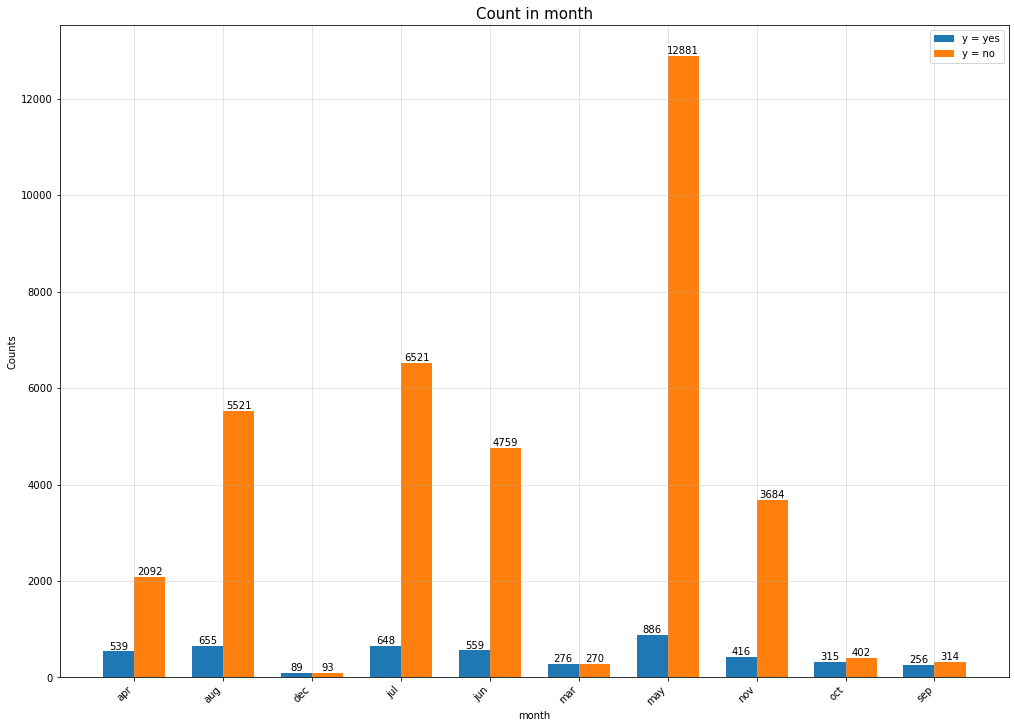

In [14]:
plot_bar(df, 'month')

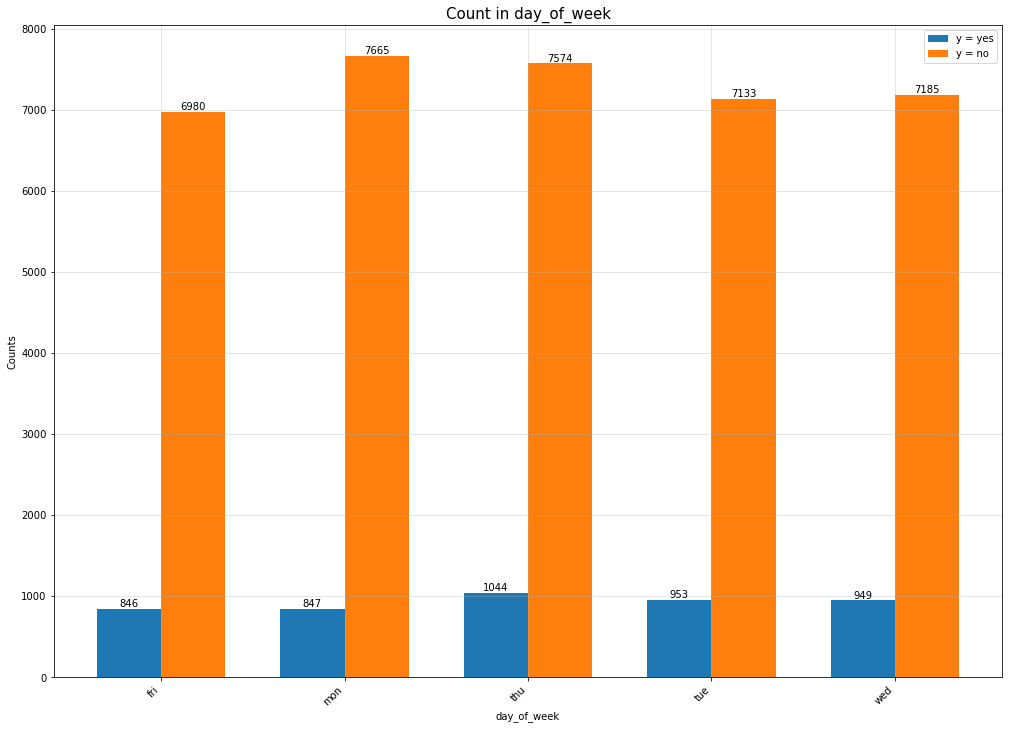

In [15]:
plot_bar(df, 'day_of_week')

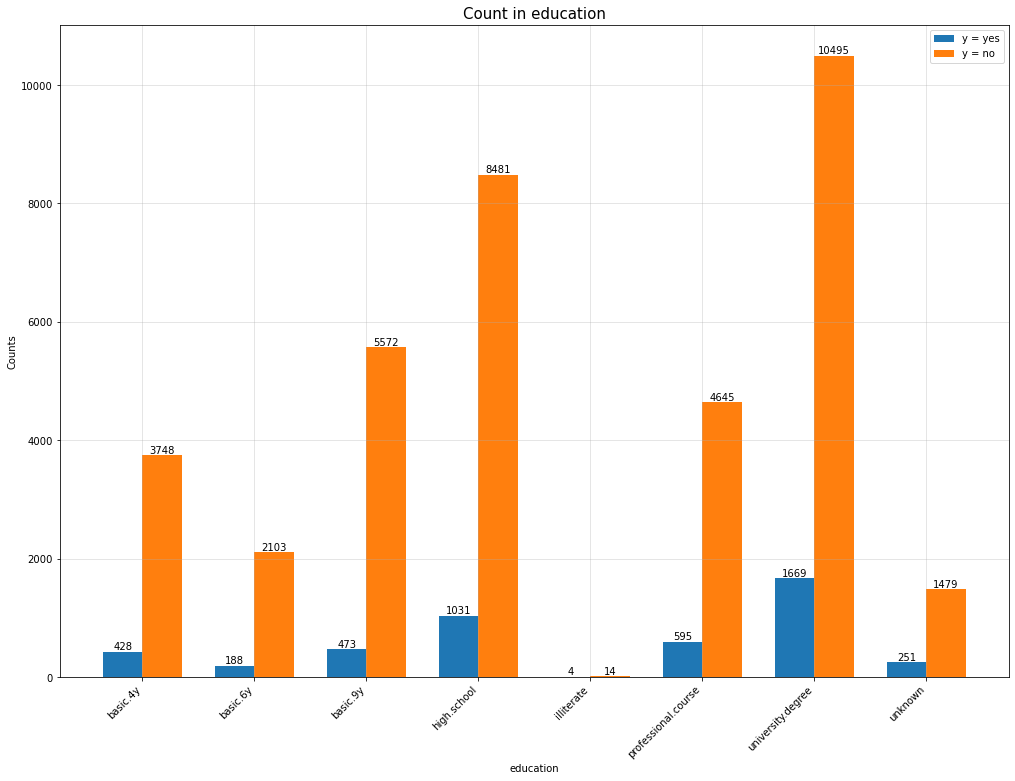

In [16]:
plot_bar(df, 'education')

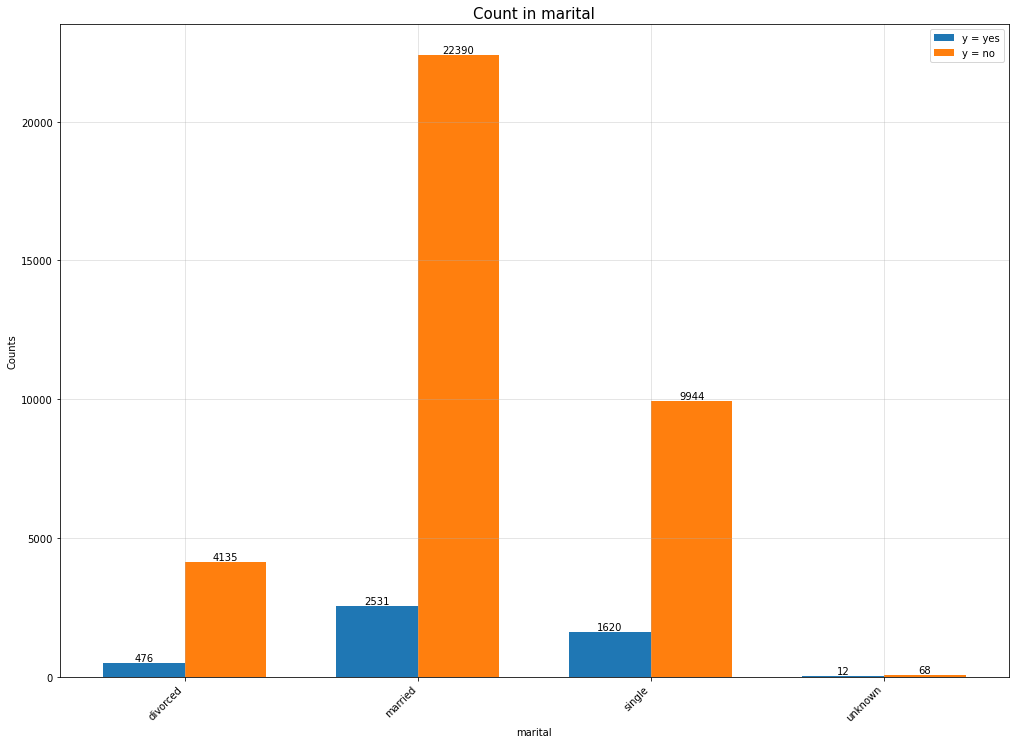

In [17]:
plot_bar(df, 'marital')

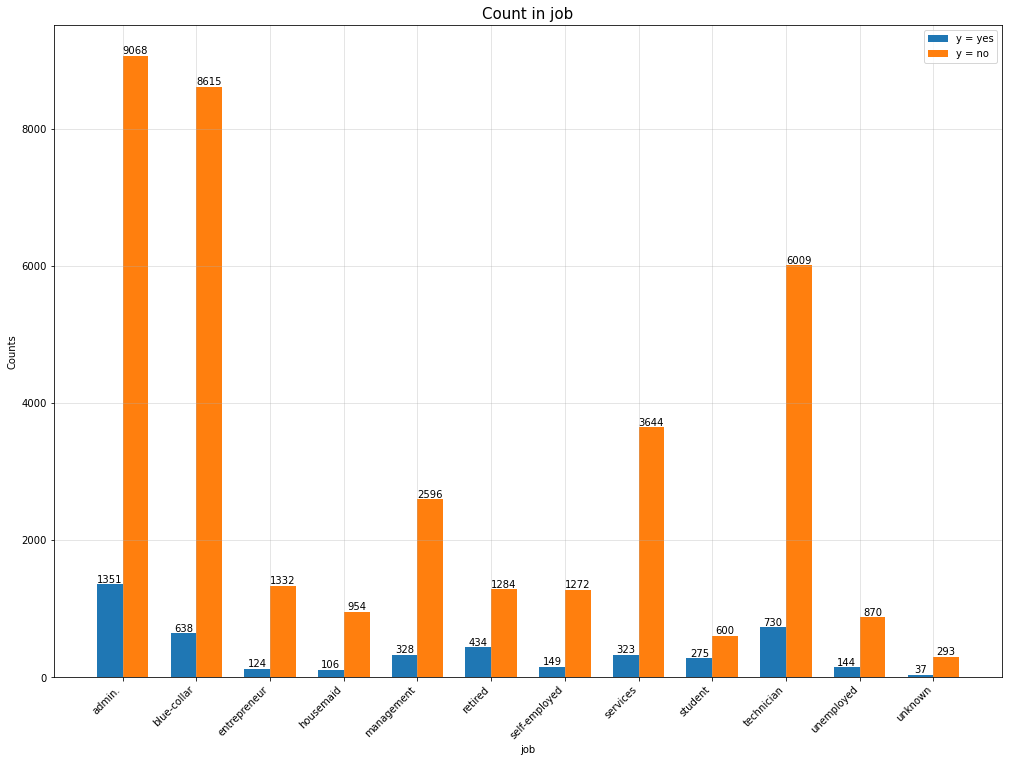

In [18]:
plot_bar(df, 'job')

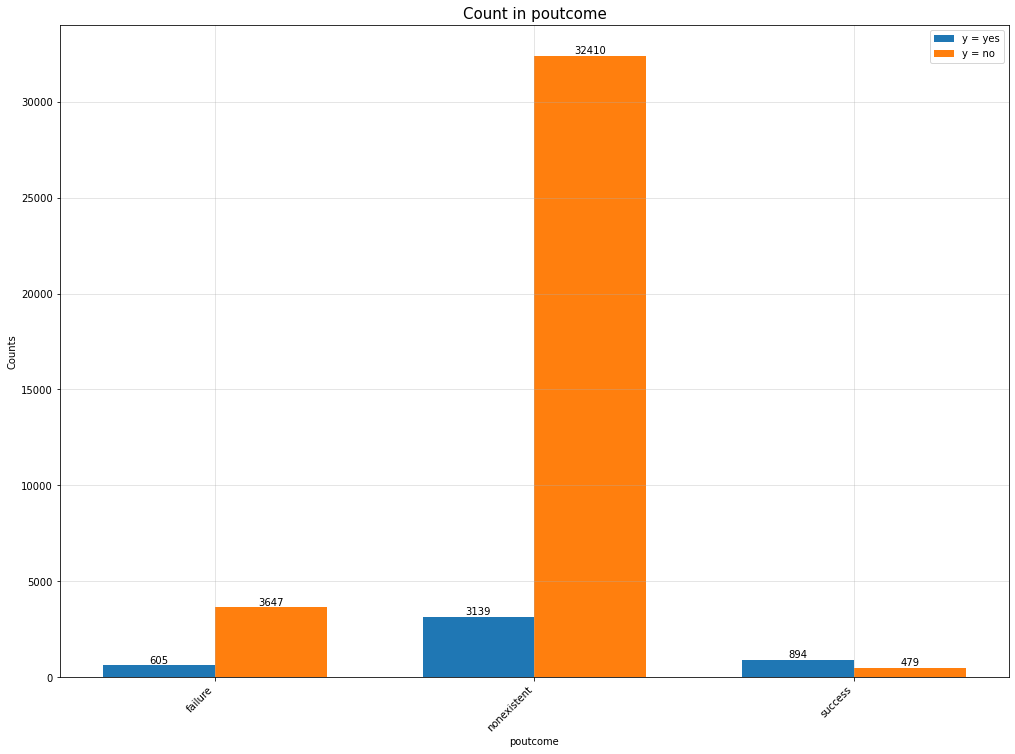

In [26]:
plot_bar(df,'poutcome')

<AxesSubplot:>

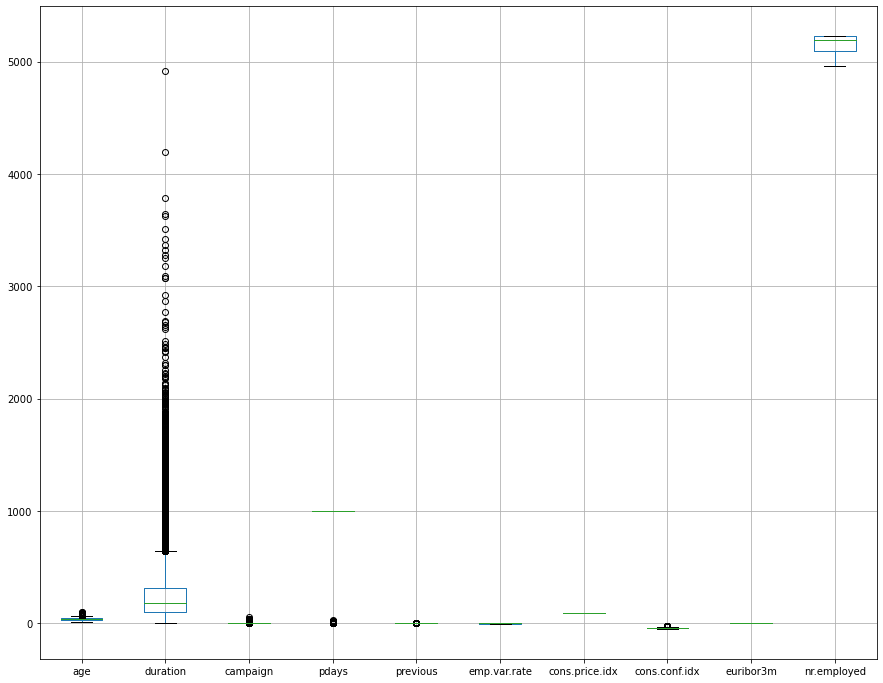

In [19]:

df.boxplot(figsize = (15,12))

In [20]:
df[df['duration']>4000]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
22192,52,blue-collar,married,basic.4y,no,no,no,telephone,aug,thu,...,3,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,yes
24091,33,technician,single,professional.course,no,yes,no,telephone,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.406,5195.8,no


In [60]:
df = df.drop([22192, 24091])

In [25]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [53]:
df[df['pdays']==999]['y'].value_counts()

no     35989
yes     3672
Name: y, dtype: int64

In [28]:
df['contact'].dtype

dtype('O')

In [131]:
from sklearn.preprocessing import MinMaxScaler

In [157]:
df1 = df.copy()
encoder = LabelEncoder()
for col in df1.columns:
    if df1[col].dtype == 'object':
        df1[col] = encoder.fit_transform(df1[col])

mms= MinMaxScaler()

for col in df1.columns:
    if df1[col].dtype != 'object':
        df1[col] = mms.fit_transform(df1[[col]])

In [158]:
df1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.481481,0.272727,0.333333,0.000000,0.0,0.0,0.0,1.0,0.666667,0.25,...,0.000000,1.0,0.000000,0.5,0.937500,0.698753,0.60251,0.957379,0.859735,0.0
1,0.493827,0.636364,0.333333,0.428571,0.5,0.0,0.0,1.0,0.666667,0.25,...,0.000000,1.0,0.000000,0.5,0.937500,0.698753,0.60251,0.957379,0.859735,0.0
2,0.246914,0.636364,0.333333,0.428571,0.0,1.0,0.0,1.0,0.666667,0.25,...,0.000000,1.0,0.000000,0.5,0.937500,0.698753,0.60251,0.957379,0.859735,0.0
3,0.283951,0.000000,0.333333,0.142857,0.0,0.0,0.0,1.0,0.666667,0.25,...,0.000000,1.0,0.000000,0.5,0.937500,0.698753,0.60251,0.957379,0.859735,0.0
4,0.481481,0.636364,0.333333,0.428571,0.0,0.0,1.0,1.0,0.666667,0.25,...,0.000000,1.0,0.000000,0.5,0.937500,0.698753,0.60251,0.957379,0.859735,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.691358,0.454545,0.333333,0.714286,0.0,1.0,0.0,0.0,0.777778,0.00,...,0.000000,1.0,0.000000,0.5,0.479167,1.000000,0.00000,0.089322,0.000000,1.0
41184,0.358025,0.090909,0.333333,0.714286,0.0,0.0,0.0,0.0,0.777778,0.00,...,0.000000,1.0,0.000000,0.5,0.479167,1.000000,0.00000,0.089322,0.000000,0.0
41185,0.481481,0.454545,0.333333,0.857143,0.0,1.0,0.0,0.0,0.777778,0.00,...,0.018182,1.0,0.000000,0.5,0.479167,1.000000,0.00000,0.089322,0.000000,0.0
41186,0.333333,0.818182,0.333333,0.714286,0.0,0.0,0.0,0.0,0.777778,0.00,...,0.000000,1.0,0.000000,0.5,0.479167,1.000000,0.00000,0.089322,0.000000,1.0


<ipython-input-208-b3826832790a>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df1.corr(), dtype = np.bool))


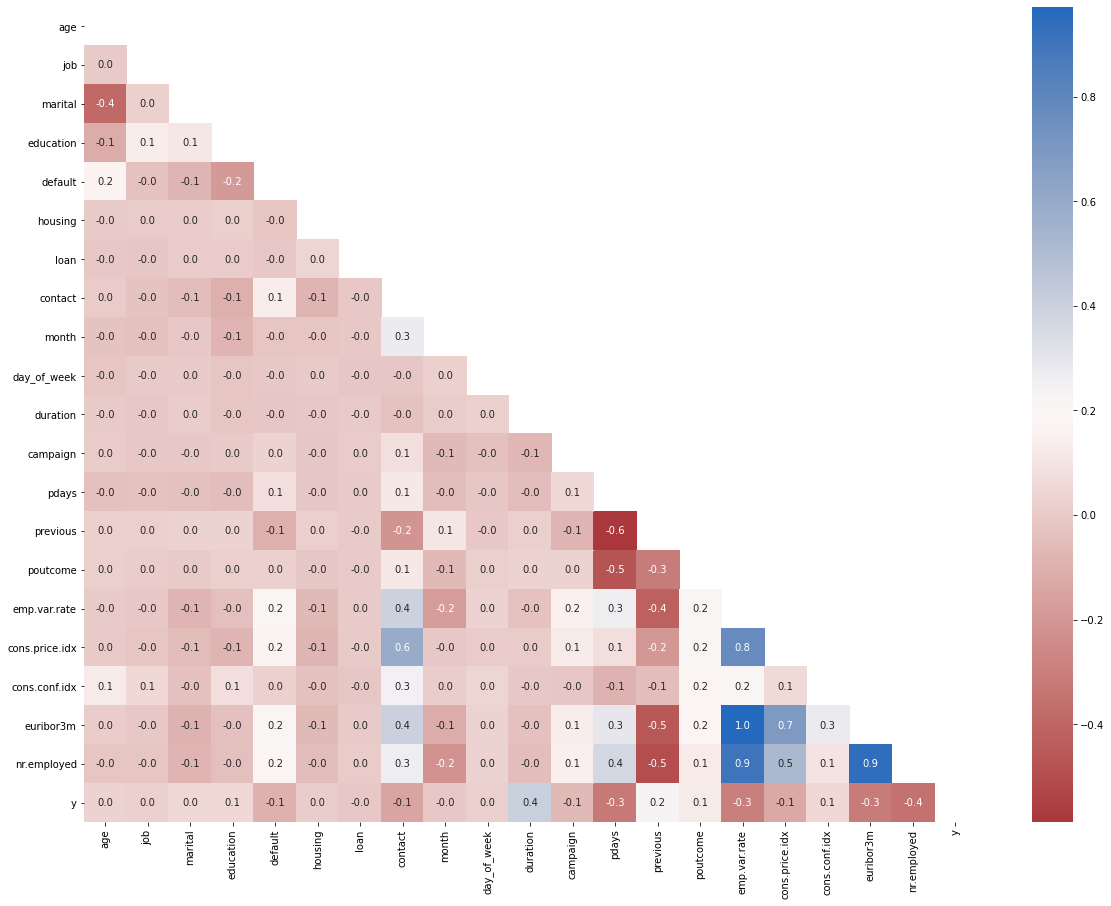

In [208]:
import seaborn as sns
plt.figure(figsize = (20,15))
mask = np.triu(np.ones_like(df1.corr(), dtype = np.bool))
sns.heatmap(df1.corr(), annot = True, fmt = '.1f',cmap = 'vlag_r', mask = mask)
plt.show()

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [161]:
X = df1.drop(['nr.employed','euribor3m','y'], axis = 1)
y = df1['y']

In [163]:
y.value_counts()

0.0    36536
1.0     4638
Name: y, dtype: int64

In [222]:
36536/4638

7.8775334195774045

In [170]:
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size= 0.3)

In [171]:
X_train.shape

(28821, 18)

In [172]:
y_train.shape

(28821,)

In [242]:
model = LogisticRegression(class_weight={0:1, 1:8})

In [243]:
model.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1, 1: 8})

In [244]:
y_pred = model.predict(X_test)

In [245]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [246]:
accuracy_score(y_test, y_pred)

0.8549340241236947

In [247]:
confusion_matrix(y_test, y_pred)

array([[9380, 1603],
       [ 189, 1181]], dtype=int64)

In [248]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.85      0.91     10983
         1.0       0.42      0.86      0.57      1370

    accuracy                           0.85     12353
   macro avg       0.70      0.86      0.74     12353
weighted avg       0.92      0.85      0.87     12353



In [3]:
from sklearn.ensemble import RandomForestClassifier

In [250]:
model1 = RandomForestClassifier(class_weight={0:1, 1:8})

In [251]:
model1.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 8})

In [252]:
y_pred1 = model1.predict(X_test)

In [253]:
accuracy_score(y_test, y_pred1)

0.9118432769367765

In [254]:
confusion_matrix(y_test, y_pred1)

array([[10630,   353],
       [  736,   634]], dtype=int64)

In [255]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95     10983
         1.0       0.64      0.46      0.54      1370

    accuracy                           0.91     12353
   macro avg       0.79      0.72      0.74     12353
weighted avg       0.90      0.91      0.91     12353



In [4]:
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

In [257]:
model2 = XGBClassifier(class_weight={0:1, 1:8})

In [258]:
model2.fit(X_train, y_train)

[15:43:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              class_weight={0: 1, 1: 8}, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, ...)

In [259]:
y_pred3 = model2.predict(X_test)

In [260]:
accuracy_score(y_test, y_pred3)

0.911438516959443

In [261]:
confusion_matrix(y_test, y_pred3)

array([[10532,   451],
       [  643,   727]], dtype=int64)